# World Freedom EDA


#### By: Lalith Sagar M


#### Data Source: [The Human Freedom Index 2023](https://www.cato.org/human-freedom-index/2023)


#### Libraries: Pandas, NumPy, Matplotlib, Seaborn (for visualization)


### Project Overview

In this ED analysis, we'll dive deep into understanding global freedom patterns. Here are the main questions we're looking to answer:

- Which countries rank highest in terms of freedom?
- How does economic freedom correlate with human freedom?
- Can a country's geographical context influence its freedom scores?


## Obtaining data

Let's study the data provided for the project.

In [3]:
#Importing Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap 

In [4]:
#Reading Data file from CSV
raw_df=pd.read_csv(r"C:\Users\lalit\OneDrive\Courses\python\Project 4 World Freedom\2023-Human-Freedom-Index-Data.csv")

#Changing settings to view all rows and columns of data frame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Data Preprocessing (Data Cleaning)


To ensure data integrity, below are the steps I took to clean the data. For this analysis, we're focusing on the top countries. Many lower-ranked countries have substantial missing data, making them less reliable for analysis.

*Note: Hong Kong was selected as the country for interesting data insights**

In [5]:
raw_df.head()

,year,iso,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol_vdem,pf_rol,pf_ss_homicide,pf_ss_homicide_data,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_violent_data,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_fatalities_data,pf_ss_disappearances_injuries,pf_ss_disappearances_injuries_data,pf_ss_disappearances_torture,pf_ss_killings,pf_ss_disappearances,pf_ss,pf_movement_vdem_foreign,pf_movement_vdem_men,pf_movement_vdem_women,pf_movement_vdem,pf_movement_cld,pf_movement,pf_religion_freedom_vdem,pf_religion_freedom_cld,pf_religion_freedom,pf_religion_suppression,pf_religion,pf_assembly_entry,pf_assembly_freedom_house,pf_assembly_freedom_bti,pf_assembly_freedom_cld,pf_assembly_freedom,pf_assembly_parties_barriers,pf_assembly_parties_bans,pf_assembly_parties_auton,pf_assembly_parties,pf_assembly_civil,pf_assembly,pf_expression_direct_killed,pf_expression_direct_killed_data,pf_expression_direct_jailed,pf_expression_direct_jailed_data,pf_expression_direct,pf_expression_vdem_cultural,pf_expression_vdem_harass,pf_expression_vdem_gov,pf_expression_vdem_internet,pf_expression_vdem_selfcens,pf_expression_vdem,pf_expression_house,pf_expression_bti,pf_expression_cld,pf_expression,pf_identity_same_m,pf_identity_same_f,pf_identity_same,pf_identity_divorce,pf_identity_inheritance_widows,pf_identity_inheritance_daughters,pf_identity_inheritance,pf_identity_fgm,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_consumption_data,ef_government_transfers,ef_government_transfers_data,ef_government_investment,ef_government_investment_data,ef_government_tax_income,ef_government_tax_income_data,ef_government_tax_payroll,ef_government_tax_payroll_data,ef_government_tax,ef_government_soa,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_regulatory,ef_legal_police,ef_gender,ef_legal,ef_money_growth,ef_money_growth_data,ef_money_sd,ef_money_sd_data,ef_money_inflation,ef_money_inflation_data,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_revenue_data,ef_trade_tariffs_mean,ef_trade_tariffs_mean_data,ef_trade_tariffs_sd,ef_trade_tariffs_sd_data,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_costs,ef_trade_regulatory,ef_trade_black,ef_trade_movement_open,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement_assets,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor_foreign,ef_regulation_labor,ef_regulation_business_burden,ef_regulation_business_costs,ef_regulation_business_impartial,ef_regulation_business_compliance,ef_regulation_business,ef_regulation_enter_openness,ef_regulation_enter_permits,ef_regulation_enter_distortion,ef_regulation_enter,ef_regulation,ef_score,ef_rank
0,2021,ALB,Albania,Eastern Europe,7.67,49.0,2.0,NaN,NaN,NaN,7.16,4.86,9.33,2.31,10.0,10.0,0.0,7.5,10.00,0.0,10.00,0.0,6.85,9.75,9.16,9.24,9.76,9.86,9.88,9.83,3.33,6.58,9.34,10.00,9.67,9.85,9.76,8.35,7.5,10.00,10.00,9.17,9.54,9.46,7.72,8.91,8.46,8.72,10.0,0,10.00,0,10.00,6.69,4.61,3.28,7.69,6.10,5.67,5.0,6.67,3.33,6.13,10.0,10.0,10.0,7.5,NaN,NaN,7.5,10.0,8.75,7.72,59.0,7.76,13.62,7.13,11.02,7.55,23.59,9.0,23,7.0,34,8.0,8.23,7.73,4.48,4.22,4.42,8.33,5.35,3.42,6.72,5.30,1.00,5.28,9.78,1.08,9.00,2.50,9.59,2.04,10.0,9.59,9.65,0.53,9.28,3.6,8.10,4.75,9.01,8.40,9.41,8.90,10.00,2.93,4.62,8.74,6.90,5.80,8.43,10.0,7.70,10.0,9.23,6.53,5.65,5.58,8.0,6.3,10.0,7.76,7.12,5.65,6.22,5.79,3.59,5.31,6.81,5.62,6.25,6.23,6.97,7.60,31.0
1,2021,DZA,Algeria,Middle East & North Africa,4.82,155.0,4.0,NaN,NaN,NaN,5.12,4.43,9.54,1.57,10.0,10.0,0.0,5.0,9.73,7.0,9.88,6

In [6]:
#Column Names
pd.DataFrame(raw_df.columns)

,0
0,year
1,iso
2,countries
3,region
4,hf_score
5,hf_rank
6,hf_quartile
7,pf_rol_procedural
8,pf_rol_civil
9,pf_rol_criminal


In [7]:
#Finding Year Range
min_year=raw_df['year'].min()
max_year=raw_df['year'].max()

print(f'The dataset ranges from {min_year} to {max_year}.')

The dataset ranges from 2000 to 2021.


In [8]:
#Missing Values
raw_df.isnull().sum()


year                                       0
iso                                        0
countries                                  0
region                                     0
hf_score                                 350
hf_rank                                  350
hf_quartile                              350
pf_rol_procedural                       2241
pf_rol_civil                            2241
pf_rol_criminal                         2241
pf_rol_vdem                               66
pf_rol                                     0
pf_ss_homicide                            48
pf_ss_homicide_data                       48
pf_ss_disappearances_disap                53
pf_ss_disappearances_violent               0
pf_ss_disappearances_violent_data          0
pf_ss_disappearances_organized           315
pf_ss_disappearances_fatalities            0
pf_ss_disappearances_fatalities_data       0
pf_ss_disappearances_injuries              0
pf_ss_disappearances_injuries_data         0
pf_ss_disa

In [9]:
#Checking Datatypes
raw_df.dtypes


year                                      int64
iso                                      object
countries                                object
region                                   object
hf_score                                float64
hf_rank                                 float64
hf_quartile                             float64
pf_rol_procedural                       float64
pf_rol_civil                            float64
pf_rol_criminal                         float64
pf_rol_vdem                             float64
pf_rol                                  float64
pf_ss_homicide                          float64
pf_ss_homicide_data                     float64
pf_ss_disappearances_disap              float64
pf_ss_disappearances_violent            float64
pf_ss_disappearances_violent_data       float64
pf_ss_disappearances_organized          float64
pf_ss_disappearances_fatalities         float64
pf_ss_disappearances_fatalities_data    float64
pf_ss_disappearances_injuries           

In [10]:
raw_df.dtypes.value_counts()

float64    137
object       6
int64        3
Name: count, dtype: int64

In [11]:
#Filtering out only 2021 Data with Required Columns
#df_copy=raw_df
df_2021=raw_df[raw_df['year']==2021]
df_2021=df_2021[['countries', 'region', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank']]
df_2021.head()

,countries,region,ef_score,ef_rank,hf_score,hf_rank
0,Albania,Eastern Europe,7.60,31.0,7.67,49.0
1,Algeria,Middle East & North Africa,4.82,157.0,4.82,155.0
2,Angola,Sub-Saharan Africa,5.38,149.0,5.76,122.0
3,Argentina,Latin America & the Caribbean,4.77,158.0,6.85,77.0
4,Armenia,Caucasus & Central Asia,7.58,33.0,7.99,33.0


In [12]:
#Removing Null Values and Duplicates
df_2021.dropna(subset=['countries'],inplace=True)
df_2021.drop_duplicates(subset=['countries'],keep='first',inplace=True)

In [13]:
df_2021.duplicated().any()

False

In [14]:
#Renaming Countries in the 'Countries' Column
country_renames = {
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Brunei Darussalam': 'Brunei',
    'United Arab Emirates': 'UAE',
    'Gambia, The': 'Gambia',
    'Russian Federation': 'Russia',
    'Hong Kong SAR, China': 'Hong Kong',
    'Korea, Rep.': 'South Korea',
    'Papua New Guinea': 'New Guinea'
}

df_2021['countries'].replace(country_renames,inplace=True)

In [15]:
df_2021

,countries,region,ef_score,ef_rank,hf_score,hf_rank
0,Albania,Eastern Europe,7.60,31.0,7.67,49.0
1,Algeria,Middle East & North Africa,4.82,157.0,4.82,155.0
2,Angola,Sub-Saharan Africa,5.38,149.0,5.76,122.0
3,Argentina,Latin America & the Caribbean,4.77,158.0,6.85,77.0
4,Armenia,Caucasus & Central Asia,7.58,33.0,7.99,33.0
5,Australia,Oceania,8.05,8.0,8.52,14.0
6,Austria,Western Europe,7.69,28.0,8.24,24.0
7,Azerbaijan,Caucasus & Central Asia,5.99,122.0,5.65,126.0
8,"Bahamas, The",Latin America & the Caribbean,6.55,93.0,7.82,41.0
9,Bahrain,Middle East & North Africa,7.44,45.0,5.47,137.0


In [16]:
#Converting hf and ef rank to int type

df_2021['ef_rank']=df_2021['ef_rank'].astype('int')
df_2021['hf_rank']=df_2021['hf_rank'].astype('int')
df_2021.dtypes

countries     object
region        object
ef_score     float64
ef_rank        int32
hf_score     float64
hf_rank        int32
dtype: object

## Visualizations & Analysis

A closer look at freedom metrics can be navigated through numbers and visualizations. This further analysis delves into understanding how countries fare in terms of human and economic freedoms.

In this section, we'll address the following questions:

- Is there a correlation between human and economic freedom scores?
- Which countries top the charts in both kinds of freedom?
- Are there regional leaders that stand out?

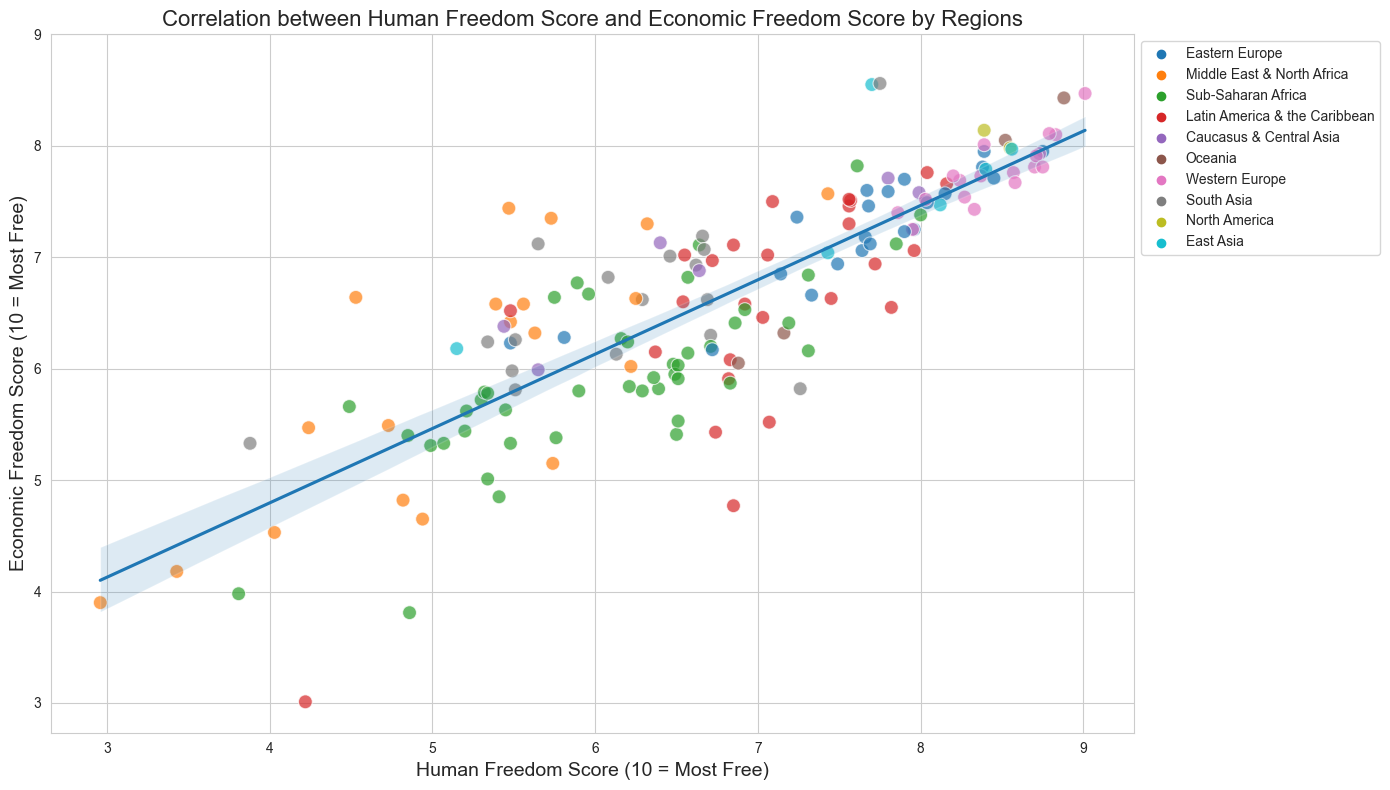

In [17]:
#Setting up the Seaborn Style
sns.set_style('whitegrid')

#Creating Scatter Plot with Colors representing Regions
plt.figure(figsize=(14,8))
sctr=sns.scatterplot(x='hf_score',y='ef_score',data=df_2021,hue='region', palette='tab10', s=100, alpha=0.7)

#Plotting a Trendline to see the Correlation better
sns.regplot(x='hf_score',y='ef_score',data=df_2021, scatter=False, ax=sctr)

#Styling and Labeling
plt.title('Correlation between Human Freedom Score and Economic Freedom Score by Regions',fontsize=16)
plt.xlabel('Human Freedom Score (10 = Most Free)', fontsize=14)
plt.ylabel('Economic Freedom Score (10 = Most Free)', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(range(3,10))
plt.yticks(range(3,10))

plt.tight_layout()
plt.show()

### Insights

The scatter plot visualizes the relationship between Human Freedom Score and Economic Freedom Score for countries across different regions. A few observations:

**Strong Upward Trend:** The plotted trendline shows a clear upward progression, suggesting that as the Human Freedom Score increases, the Economic Freedom Score tends to increase as well. This is a strong indicator of positive correlation between the two freedom scores, implying that they are somewhat interdependent for the countries.

**Regional Differences:** Different color markers represent various regions, providing insights into how countries from different geographical contexts fare in terms of freedom scores. It might be beneficial to have a better look into individual regions to understand the nuances better.

In [18]:
#Combining the Scores and Identitfying top 20 Countries

df_2021['total_freedom']=df_2021['ef_score']+df_2021['hf_score']
df_top_20=df_2021.nlargest(20,'total_freedom')
df_sorted_20=df_top_20.sort_values(by='total_freedom',ascending=True)

In [19]:
df_sorted_20

,countries,region,ef_score,ef_rank,hf_score,hf_rank,total_freedom
41,Czech Republic,Eastern Europe,7.81,17,8.38,20,16.19
66,Hong Kong,East Asia,8.55,2,7.70,46,16.25
114,Norway,Western Europe,7.67,29,8.58,10,16.25
133,Singapore,South Asia,8.56,1,7.75,44,16.31
108,Netherlands,Western Europe,7.76,21,8.57,11,16.33
90,Lithuania,Eastern Europe,7.95,12,8.39,17,16.34
157,United Kingdom,Western Europe,8.01,9,8.39,17,16.40
52,Finland,Western Europe,7.81,17,8.70,9,16.51
158,United States,North America,8.14,5,8.39,17,16.53
145,Taiwan,East Asia,7.97,11,8.56,12,16.53


In [20]:
max(df_sorted_20['total_freedom'])

17.48

In [21]:
len(df_sorted_20['countries'])

20

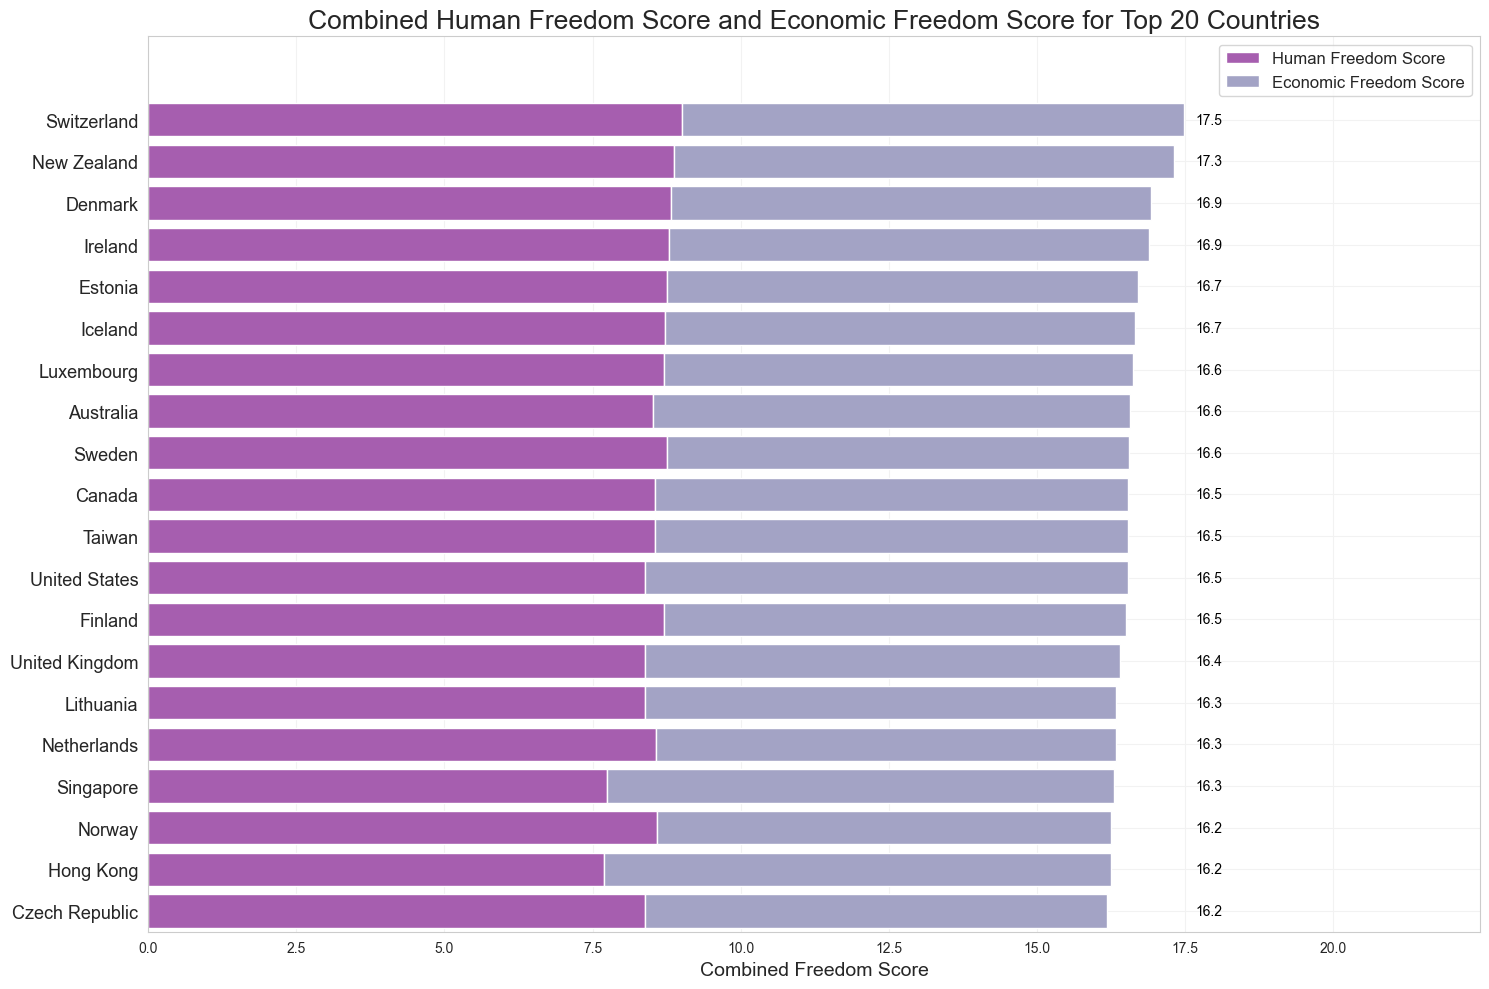

In [23]:
#Choosing Grid Style and reducing Grid Transperency
sns.set_style('whitegrid', {'grid.color': '.95'})

#Plotting a horizontal stacked bar
plt.figure(figsize=(15, 10))
colors_human='#A65EAF' 
colors_economic='#A3A3C5' 
bars1=plt.barh(df_sorted_20['countries'], df_sorted_20['hf_score'], label='Human Freedom Score', color=colors_human)
bars2=plt.barh(df_sorted_20['countries'], df_sorted_20['ef_score'], left=df_sorted_20['hf_score'], label='Economic Freedom Score', color=colors_economic)

#Y/X axes settings
x_max_limit=max(df_sorted_20['total_freedom']) + 5
plt.xlim(0, x_max_limit)
plt.ylim(-0.5, len(df_sorted_20['countries']) + 1)
for index, value in enumerate(df_sorted_20['total_freedom']):
    plt.text(x_max_limit - 4.35, index, str(round(value, 1)), va='center', ha='right', color='black', fontsize=10)



#Styling and labeling
plt.xlabel('Combined Freedom Score', fontsize=14)
plt.title('Combined Human Freedom Score and Economic Freedom Score for Top 20 Countries', fontsize=19)
plt.yticks(fontsize=13)  #Increased fontsize for country names
legend=plt.legend(loc='upper right', fontsize='large', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

### Insights:

## Top 20 Countries by Combined Freedom Score

The visualized data provides view of the countries that are leading the charts when it comes to a combined measure of human and economic freedom.

- **Switzerland, a Global Leader:** Topping the list, Switzerland boasts a score of 17.5. Its position reaffirms the country's reputation for being a hub of both human rights and economic opportunity.

- **Close Contenders:** New Zealand and Denmark follow closely with scores of 17.3 and 16.9. This shows that the top spots are highly competitive, with only marginal differences in scores.

- **Two Values Stand Out:** While countries like Hong Kong and Singapore are on the list, their distribution between human and economic freedom is distinct. They have slightly lower human freedom scores but outpace many with their economic freedom ratings.

- **The Balance:** Countries like Estonia, Lithuania, and Luxembourg, despite their relatively small size, display a balanced score, reflecting a commendable balance between human rights and economic policies.

- **Diversity:** The list showcases a geographically diverse set, spanning continents from North America to Asia and Europe. This suggests that the ethos of freedom isn't confined to a particular region but is a global aspiration.

Considering the close competition among the top contenders, it might be insightful to delve deeper into the regional and historical factors influencing these scores. Additionally, comparing regions can provide more granular insights, revealing patterns and divergences within specific geographies.

****Note: The combined score is a sum of the Human Freedom Score and Economic Freedom Score. A higher score indicates a higher level of freedom.**

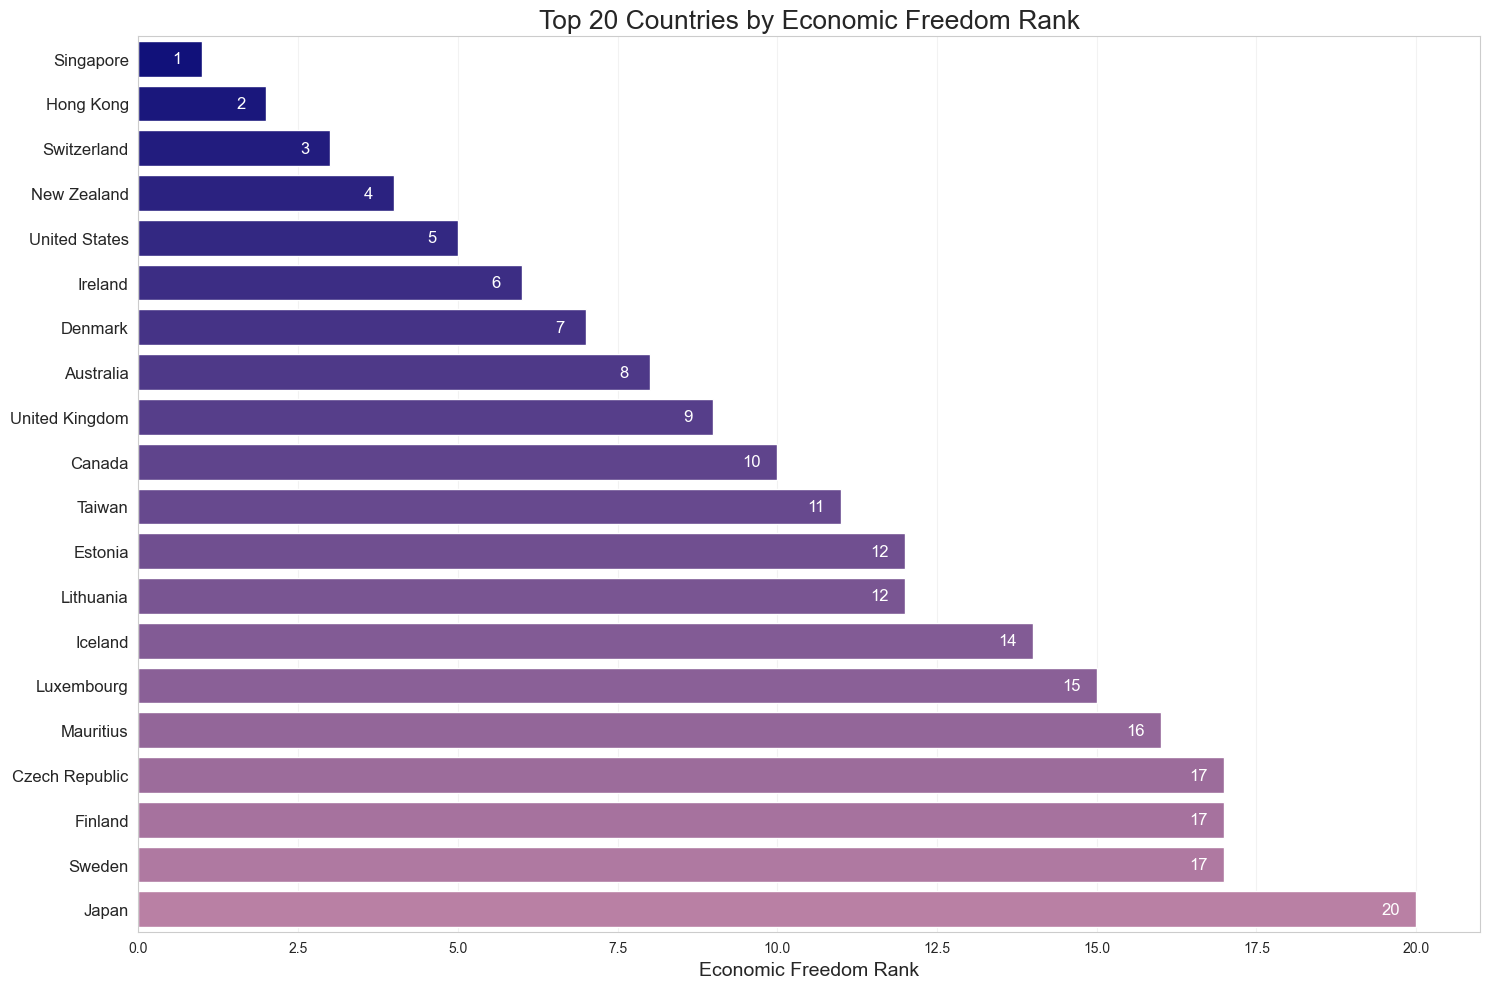

In [24]:
#Creating a data frame based on top 20 ef rank
top_countries_df=df_2021.nsmallest(20,'ef_rank')

#Plotting a horizontal bar chart
plt.figure(figsize=(15,10))
cmap=sns.color_palette('blend:darkblue,#C276A7', n_colors=20)
plot=sns.barplot(x='ef_rank',y='countries',data=top_countries_df,palette=cmap)

#Styling and Labeling
plt.title('Top 20 Countries by Economic Freedom Rank', fontsize=19)
plt.xlabel('Economic Freedom Rank', fontsize=14)
plt.ylabel('')
plt.yticks(fontsize=12)  # Country fontsize
for index,value in enumerate(top_countries_df['ef_rank']):
    plot.text(value-0.4,index,str(value), va='center', ha='center', color='white', fontsize=12)

plt.tight_layout()
plt.show()

### Insights

## Economic Freedom Rankings

In the realm of global economies, there's a hierarchy where certain nations consistently stays at the top. Let's summarize what the 2021 rankings reveal.

- **The Usual Suspects:** Hong Kong, Singapore and Switzerland continue their reign, clinching the top two spots. Their strategic locations and robust economic policies have long anchored their statuses as global financial hubs.

- **Balanced Economies:** Nations like New Zealand, Denmark, and the U.S. find their place within the top 10, testament to their well-rounded economic policies and adaptability.

- **Emerging Star:** Mauritius making the cut showcases the increasing diversification of global economic leadership. Their ascent is a study in economic resilience and innovation.

- **Baltic Prowess:** The presence of two out of three Baltic states - Estonia, and Lithuania - within the top echelons emphasizes their collective economic growth trajectory and inter-regional synergies.

From a data science view, rankings come from analyzing various features. It's key to recognize the feature importance – which factors weigh more in determining a country's rank. Some countries excel due to fiscal policies, others from trade openness. Understanding feature importance helps highlight what drives a nation's economic freedom. It's also crucial to remember that minor changes in these features can shift rankings significantly.

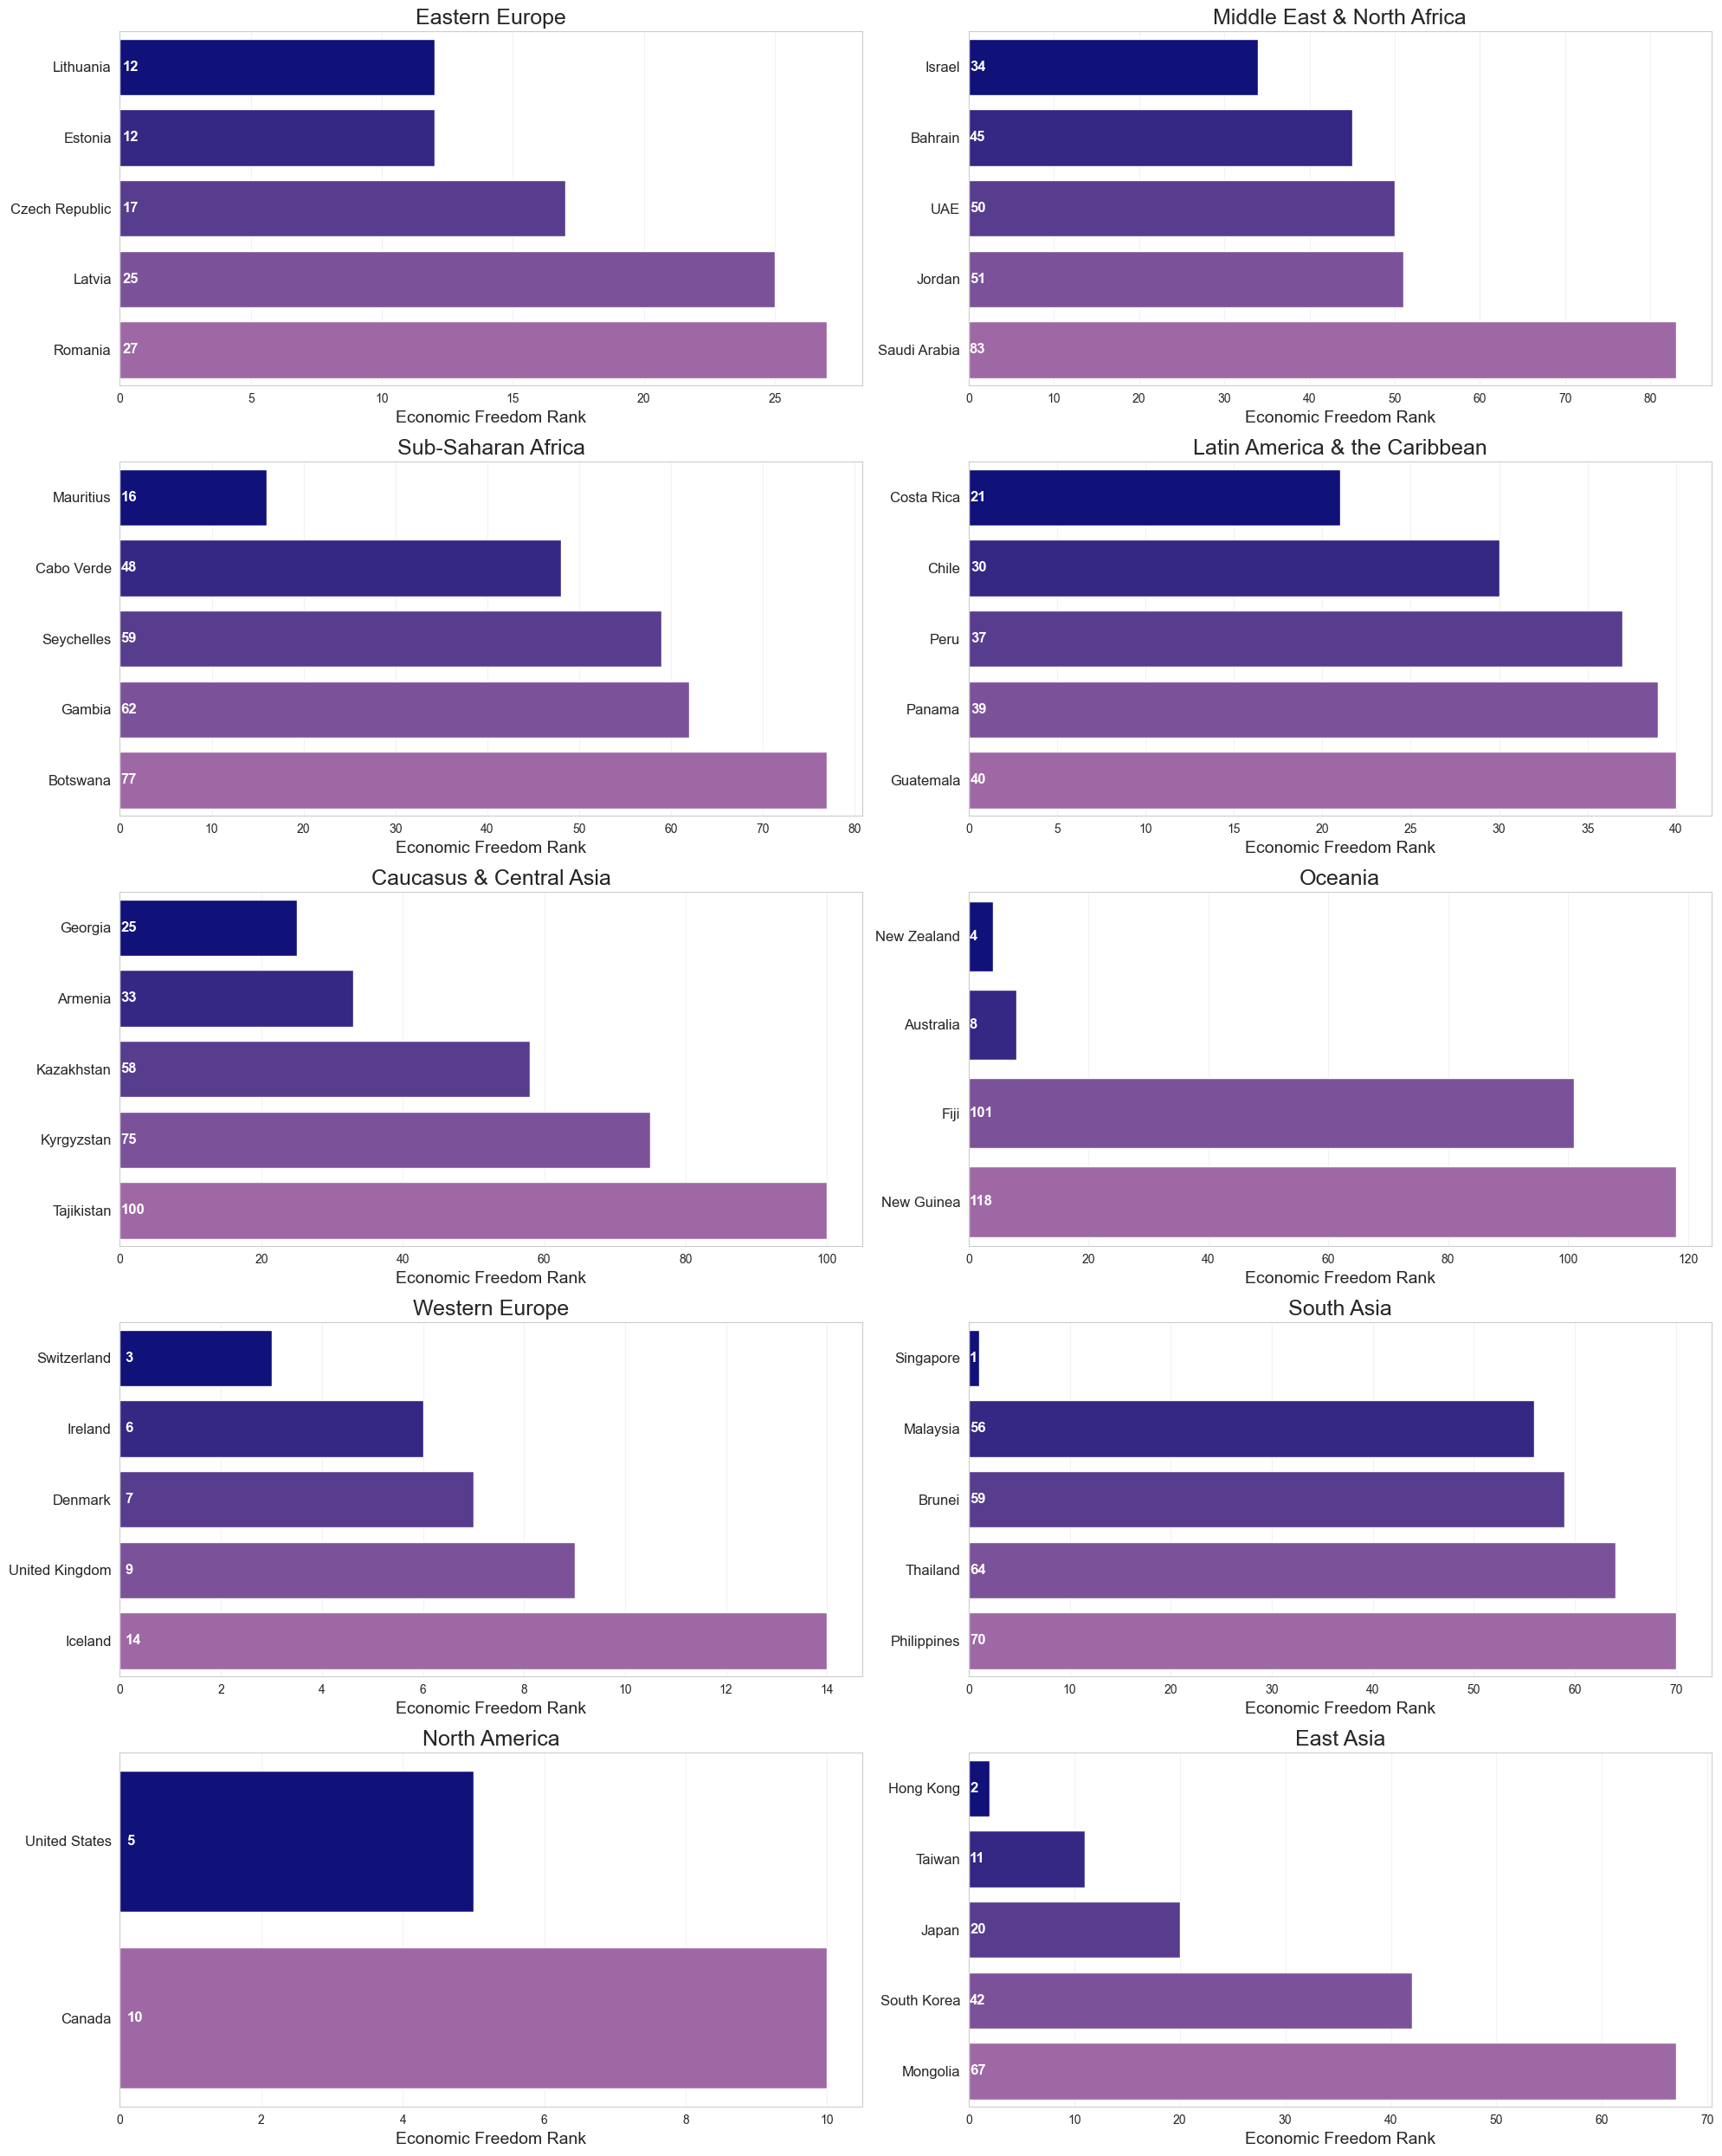

In [25]:
#Preparing Data
regions=df_2021['region'].unique()
num_rows=int(len(regions)/2)

#Creating the subplots and viz settings
fig,axes=plt.subplots(nrows=num_rows,ncols=2, figsize=(20, 5*num_rows))
fig.tight_layout(pad=5.0)
cmap=LinearSegmentedColormap.from_list('custom', ['darkblue','#A65EAF'], N=5)

#Looping through each region and creating a Bar Plot
for region, ax in zip(regions, axes.ravel()):
    
    regional_data=df_2021[df_2021['region']==region].sort_values(by='ef_rank').head(5)
    colors=[cmap(i) for i in np.linspace(0, 1, len(regional_data))]
    sns.barplot(x='ef_rank', y='countries', data=regional_data, ax=ax, palette=colors)
    
    #Styling and Labeling
    ax.set_title(region, fontsize=18)
    ax.set_xlabel('Economic Freedom Rank', fontsize=14)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_ylabel('')
    for index, value in enumerate(regional_data['ef_rank']):
        ax.text(ax.get_xlim()[0]+0.1, index, f'{int(value)}', va='center', color='white', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### Insights

## Regional Economic Freedom Leaders

Analyzing the data, it becomes evident which countries are the pinnacles of economic freedom within their regions:

- **Regional Leaders:** These countries have secured the top ranks in economic freedom within their geographical contexts.

- **Color Significance:** The gradient transition from blue to purple is indicative of rank within the region's top 5; a visual aid to quickly discern positioning.

By examining these regional leaders, we get a nuanced perspective of economic freedom, revealing that global rank isn't the only metric that matters. Regional dominance showcases the influence and benchmark these countries set in their localities.

## Conclusion

In this project, we explored the economic freedom rankings of various countries, looked into the significant factors that influence these rankings, and highlighted some standout nations. Different tools and libraries allowed us to extract meaningful insights aswell as process and visualize the data. Future work might focus on diving deeper into individual features, predicting shifts in rankings, or comparing freedom metrics with other societal indicators.